In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt


In [3]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv', low_memory = False)


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [5]:
flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [6]:
flights.loc[((flights['CANCELLED']==0)&(flights['DIVERTED']==0)),:].isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

In [7]:
#'DEPARTURE_TIME' = WHEEL_OFF - TAXI_OUT
# 'AIR_TIME' The time duration between wheels_off and wheels_on time
# 'ELAPSED_TIME' AIR_TIME+TAXI_IN+TAXI_OUT
# 'ARRIVAL_TIME'   WHEELS_ON+TAXI_IN

In [8]:
flights_1 = flights.loc[((flights['CANCELLED']==0)&(flights['DIVERTED']==0)),:].copy()
flights_1.drop(['CANCELLED','DIVERTED','CANCELLATION_REASON','AIR_SYSTEM_DELAY'
                ,'SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis=1, inplace=True)

In [9]:
flights_1.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0


In [10]:
#Zmiana kolumn 'YEAR','MONTH', 'DAY' na 'DATE'

In [11]:
flights_1['DATE'] = pd.to_datetime(flights[['YEAR','MONTH', 'DAY']])

In [12]:
flights_1.drop(['YEAR', 'MONTH','DAY'], axis=1, inplace=True)

In [13]:
flights_1.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DATE
0,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,2015-01-01
2,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,2015-01-01


In [14]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [15]:
airlines = airlines.rename(columns={'IATA_CODE' : 'AIRLINE','AIRLINE' : 'AIRLINE_NAME'})

In [16]:
#MERGING

In [17]:
 flights_2 = flights_1.merge(airlines, how='inner')

In [18]:
flights_2.head()

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DATE,AIRLINE_NAME
0,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,2015-01-01,Alaska Airlines Inc.
1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,2015-01-01,Alaska Airlines Inc.
2,4,AS,108,N309AS,ANC,SEA,45,41.0,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,509,455.0,-14.0,2015-01-01,Alaska Airlines Inc.
3,4,AS,122,N413AS,ANC,PDX,50,46.0,-4.0,11.0,57.0,215.0,201.0,187.0,1542,504.0,3.0,525,507.0,-18.0,2015-01-01,Alaska Airlines Inc.
4,4,AS,130,N457AS,FAI,SEA,115,107.0,-8.0,25.0,132.0,213.0,218.0,186.0,1533,538.0,7.0,548,545.0,-3.0,2015-01-01,Alaska Airlines Inc.


In [19]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [20]:
airports = airports.rename(columns={'IATA_CODE' : 'AIRPORT_CODE'})

In [21]:
airports = airports.dropna(subset = ['LATITUDE','LONGITUDE'])

In [22]:
# Zmiana wyświetlania zmiennych godzinowych
def conv_time(time_val):
    if pd.isnull(time_val):
        return np.nan
    else:
            # 24:00 na 00:00:
        if time_val == 2400: time_val = 0
        time_val = "{0:04d}".format(int(time_val))
        time_formatted = datetime.time(int(time_val[0:2]), int(time_val[2:4]))
    return time_formatted

In [23]:
flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].apply(conv_time)
flights['SCHEDULED_DEPARTURE'] = flights['SCHEDULED_DEPARTURE'].apply(conv_time)
flights['WHEELS_OFF'] = flights['WHEELS_OFF'].apply(conv_time)
flights['WHEELS_ON'] = flights['WHEELS_ON'].apply(conv_time)
flights['SCHEDULED_ARRIVAL'] = flights['SCHEDULED_ARRIVAL'].apply(conv_time)

In [24]:
#zmiana nazw kolumn, merge danych

In [25]:
origin_airport = airports[['AIRPORT_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE']].copy()

In [26]:
origin_airport = origin_airport.rename(columns={'AIRPORT_CODE' : 'ORIGIN_AIRPORT_CODE', 'AIRPORT' : 'ORIGIN_AIRPORT', 'CITY' : 'ORIGIN_AIRPORT_CITY', 'STATE' : 'ORIGIN_AIRPORT_STATE', 'COUNTRY' : 'ORIGIN_AIRPORT_COUNTRY', 'LATITUDE' : 'ORIGIN_AIRPORT_LATITUDE', 'LONGITUDE' : 'ORIGIN_AIRPORT_LONGITUDE'})

In [27]:
destination_airport = airports[['AIRPORT_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE', 'LONGITUDE']].copy()

In [28]:
destination_airport = destination_airport.rename(columns={'AIRPORT_CODE' : 'DESTINATION_AIRPORT_CODE', 'AIRPORT' : 'DESTINATION_AIRPORT', 'CITY' : 'DESTINATION_AIRPORT_CITY', 'STATE' : 'DESTINATION_AIRPORT_STATE', 'COUNTRY' : 'DESTINATION_AIRPORT_COUNTRY', 'LATITUDE' : 'DESTINATION_AIRPORT_LATITUDE', 'LONGITUDE' : 'DESTINATION_AIRPORT_LONGITUDE'})

In [29]:
flights_3= flights_2.rename(columns={'AIRLINE' : 'AIRLINE_CODE', 'ORIGIN_AIRPORT' : 'ORIGIN_AIRPORT_CODE', 'DESTINATION_AIRPORT' : 'DESTINATION_AIRPORT_CODE'})
flights_3

,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DATE,AIRLINE_NAME
0,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,2015-01-01,Alaska Airlines Inc.
1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,2015-01-01,Alaska Airlines Inc.
2,4,AS,108,N309AS,ANC,SEA,45,41.0,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,509,455.0,-14.0,2015-01-01,Alaska Airlines Inc.
3,4,AS,122,N413AS,ANC,PDX,50,46.0,-4.0,11.0,57.0,215.0,201.0,187.0,1542,504.0,3.0,525,507.0,-18.0,2015-01-01,Alaska Airlines Inc.
4,4,AS,130,N457AS,FAI,SEA,115,107.0,-8.0,25.0,132.0,213.0,218.0,186.0,1533,538.0,7.0,548,545.0,-3.0,2015-01-01,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,4,VX,769,N622VA,LGA,DAL,1855,1847.0,-8.0,10.0,1857.0,245.0,247.0,231.0,1381,2148.0,6.0,2200,2154.0,-6.0,2015-12-31,Virgin America
5714004,4,VX,357,N284VA,BOS,SFO,1859,1849.0,-10.0,12.0,1901.0,411.0,375.0,357.0,2704,2158.0,6.0,2250,2204.0,-46.0,2015-12-31,Virgin America
5714005,4,VX,1916,N853VA,SFO,LAS,1940,1933.0,-7.0,10.0,1943.0,90.0,79.0,58.0,414,2041.0,11.0,2110,2052.0,-18.0,2015-12-31,Virgin America
5714006,4,VX,490,N840VA,LAX,LAS,1950,1948.0,-2.0,7.0,1955.0,65.0,56.0,39.0,236,2034.0,10.0,2055,2044.0,-11.0,2015-12-31,Virgin America


In [30]:
flights_3 = flights_3.merge(origin_airport, how='right')

In [31]:
flights_3 = flights_3.merge(destination_airport, how='right')

In [32]:
flights_3.columns

Index(['DAY_OF_WEEK', 'AIRLINE_CODE', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT_CODE', 'DESTINATION_AIRPORT_CODE',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DATE', 'AIRLINE_NAME', 'ORIGIN_AIRPORT',
       'ORIGIN_AIRPORT_CITY', 'ORIGIN_AIRPORT_STATE', 'ORIGIN_AIRPORT_COUNTRY',
       'ORIGIN_AIRPORT_LATITUDE', 'ORIGIN_AIRPORT_LONGITUDE',
       'DESTINATION_AIRPORT', 'DESTINATION_AIRPORT_CITY',
       'DESTINATION_AIRPORT_STATE', 'DESTINATION_AIRPORT_COUNTRY',
       'DESTINATION_AIRPORT_LATITUDE', 'DESTINATION_AIRPORT_LONGITUDE'],
      dtype='object')

In [33]:
flights_3 = flights_3.drop(['DESTINATION_AIRPORT_STATE', 'DESTINATION_AIRPORT_COUNTRY', 
                            'DESTINATION_AIRPORT_LATITUDE', 'DESTINATION_AIRPORT_LONGITUDE',
                            'ORIGIN_AIRPORT_STATE','ORIGIN_AIRPORT_COUNTRY', 'ORIGIN_AIRPORT_LATITUDE', 'ORIGIN_AIRPORT_LONGITUDE'], axis=1)

In [34]:
flights_3.head()

,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DATE,AIRLINE_NAME,ORIGIN_AIRPORT,ORIGIN_AIRPORT_CITY,DESTINATION_AIRPORT,DESTINATION_AIRPORT_CITY
0,7,DL,2036,N979AT,ATL,ABE,2101,2101.0,0.0,22.0,2123.0,110.0,111.0,85.0,692,2248.0,4.0,2251,2252.0,1.0,2015-01-04,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,Lehigh Valley International Airport,Allentown
1,1,DL,1411,N989AT,ATL,ABE,2034,2032.0,-2.0,17.0,2049.0,111.0,115.0,93.0,692,2222.0,5.0,2225,2227.0,2.0,2015-01-05,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,Lehigh Valley International Airport,Allentown
2,2,DL,1411,N979AT,ATL,ABE,2034,2032.0,-2.0,12.0,2044.0,111.0,109.0,93.0,692,2217.0,4.0,2225,2221.0,-4.0,2015-01-06,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,Lehigh Valley International Airport,Allentown
3,3,DL,1411,N958AT,ATL,ABE,2034,2031.0,-3.0,14.0,2045.0,111.0,115.0,97.0,692,2222.0,4.0,2225,2226.0,1.0,2015-01-07,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,Lehigh Valley International Airport,Allentown
4,4,DL,1411,N994AT,ATL,ABE,2034,2030.0,-4.0,20.0,2050.0,111.0,113.0,89.0,692,2219.0,4.0,2225,2223.0,-2.0,2015-01-08,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,Lehigh Valley International Airport,Allentown


In [35]:
#Kodowanie numeryczne zmiennych object

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
flights_3['AIRLINE_CODE']= le.fit_transform(flights_3['AIRLINE_CODE'])
flights_3['ORIGIN_AIRPORT_CODE'] = le.fit_transform(flights_3['ORIGIN_AIRPORT_CODE'])
flights_3['DESTINATION_AIRPORT_CODE'] = le.fit_transform(flights_3['DESTINATION_AIRPORT_CODE'])
flights_3['TAIL_NUMBER']= le.fit_transform(flights_3['TAIL_NUMBER'])

In [38]:
flights_3.drop(['AIRLINE_NAME','ORIGIN_AIRPORT','ORIGIN_AIRPORT_CITY','DESTINATION_AIRPORT','DESTINATION_AIRPORT_CITY','DATE'],axis=1, inplace= True)

In [39]:
flights_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222000 entries, 0 to 5221999
Data columns (total 20 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   DAY_OF_WEEK               int64  
 1   AIRLINE_CODE              int64  
 2   FLIGHT_NUMBER             int64  
 3   TAIL_NUMBER               int64  
 4   ORIGIN_AIRPORT_CODE       int64  
 5   DESTINATION_AIRPORT_CODE  int64  
 6   SCHEDULED_DEPARTURE       int64  
 7   DEPARTURE_TIME            float64
 8   DEPARTURE_DELAY           float64
 9   TAXI_OUT                  float64
 10  WHEELS_OFF                float64
 11  SCHEDULED_TIME            float64
 12  ELAPSED_TIME              float64
 13  AIR_TIME                  float64
 14  DISTANCE                  int64  
 15  WHEELS_ON                 float64
 16  TAXI_IN                   float64
 17  SCHEDULED_ARRIVAL         int64  
 18  ARRIVAL_TIME              float64
 19  ARRIVAL_DELAY             float64
dtypes: float64(11), int64(9)

In [40]:
flights_4 = flights_3.copy()

In [41]:
flights_4.drop(['SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_ARRIVAL'],axis=1, inplace= True)

In [42]:
flights_4.drop(['ARRIVAL_TIME'],axis=1, inplace= True)

In [43]:
flights_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5222000 entries, 0 to 5221999
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   DAY_OF_WEEK               int64  
 1   AIRLINE_CODE              int64  
 2   FLIGHT_NUMBER             int64  
 3   TAIL_NUMBER               int64  
 4   ORIGIN_AIRPORT_CODE       int64  
 5   DESTINATION_AIRPORT_CODE  int64  
 6   DEPARTURE_DELAY           float64
 7   TAXI_OUT                  float64
 8   WHEELS_OFF                float64
 9   SCHEDULED_TIME            float64
 10  ELAPSED_TIME              float64
 11  AIR_TIME                  float64
 12  DISTANCE                  int64  
 13  WHEELS_ON                 float64
 14  TAXI_IN                   float64
 15  ARRIVAL_DELAY             float64
dtypes: float64(9), int64(7)
memory usage: 677.3 MB


In [44]:
corr = flights_4.corr()
corr.replace(1, -1).max()

DAY_OF_WEEK                 0.015948
AIRLINE_CODE                0.094301
FLIGHT_NUMBER               0.077456
TAIL_NUMBER                 0.094301
ORIGIN_AIRPORT_CODE         0.085863
DESTINATION_AIRPORT_CODE    0.101811
DEPARTURE_DELAY             0.945185
TAXI_OUT                    0.228078
WHEELS_OFF                  0.693019
SCHEDULED_TIME              0.990659
ELAPSED_TIME                0.989848
AIR_TIME                    0.990659
DISTANCE                    0.985354
WHEELS_ON                   0.693019
TAXI_IN                     0.154929
ARRIVAL_DELAY               0.945185
dtype: float64

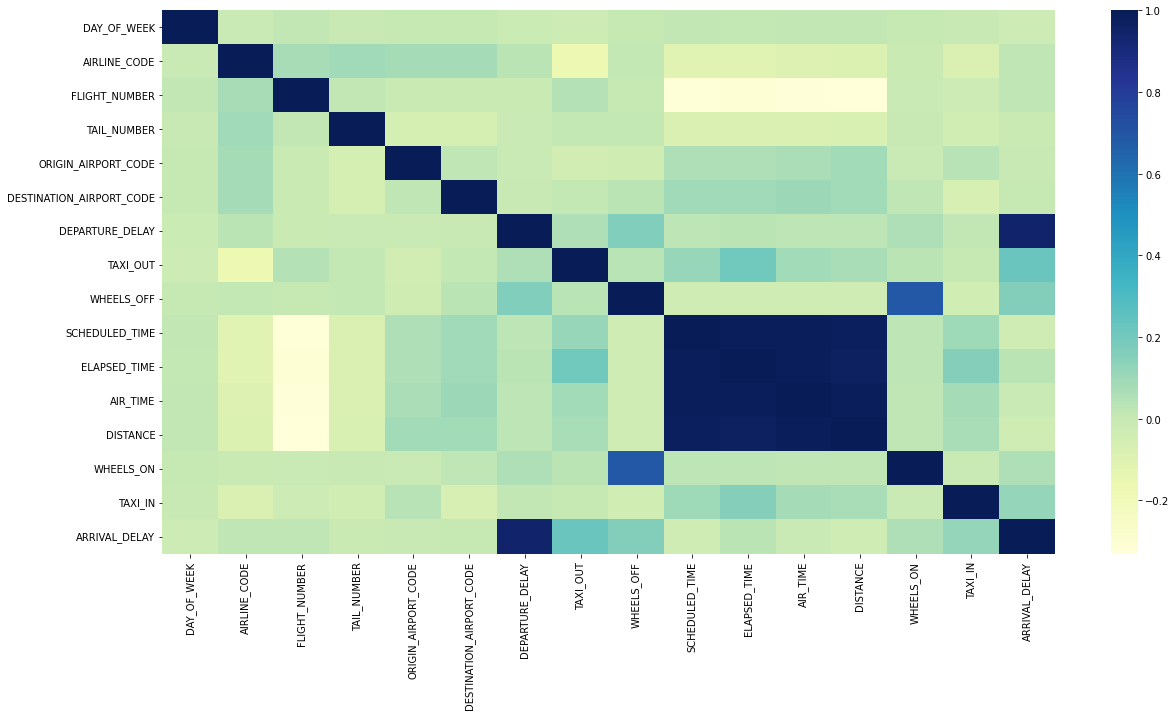

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="YlGnBu")

In [46]:
corr

,DAY_OF_WEEK,AIRLINE_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_CODE,DESTINATION_AIRPORT_CODE,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,ARRIVAL_DELAY
DAY_OF_WEEK,1.000000,-0.005651,0.015488,-0.000240,0.004250,0.004411,-0.015044,-0.022319,0.004162,0.014650,0.011054,0.014116,0.015948,0.005950,0.000186,-0.021248
AIRLINE_CODE,-0.005651,1.000000,0.077456,0.094301,0.082701,0.082543,0.028838,-0.169275,0.010740,-0.106159,-0.111536,-0.087437,-0.083165,-0.008698,-0.078730,0.019896
FLIGHT_NUMBER,0.015488,0.077456,1.000000,0.015189,-0.011550,-0.011611,-0.008938,0.047680,0.005493,-0.317195,-0.307856,-0.320790,-0.330992,-0.005480,-0.019212,0.017523
TAIL_NUMBER,-0.000240,0.094301,0.015189,1.000000,-0.059025,-0.058938,-0.005778,0.008418,0.008557,-0.076288,-0.079334,-0.079819,-0.076144,0.000806,-0.035165,-0.009082
ORIGIN_AIRPORT_CODE,0.004250,0.082701,-0.011550,-0.059025,1.000000,0.018068,-0.006704,-0.041881,-0.032174,0.059026,0.062491,0.066301,0.085863,-0.004189,0.039799,-0.001406
DESTINATION_AIRPORT_CODE,0.004411,0.082543,-0.011611,-0.058938,0.018068,1.000000,0.001072,0.011825,0.029906,0.092866,0.095235,0.101811,0.086198,0.021627,-0.069010,0.002949
DEPARTURE_DELAY,-0.015044,0.028838,-0.008938,-0.005778,-0.006704,0.001072,1.000000,0.059168,0.165589,0.027224,0.030453,0.022909,0.023488,0.059168,0.013293,0.945185
TAXI_OUT,-0.022319,-0.169275,0.047680,0.008418,-0.041881,0.011825,0.059168,1.000000,0.037713,0.112940,0.206884,0.088154,0.072564,0.030963,0.003912,0.228078
WHEELS_OFF,0.004162,0.010740,0.005493,0.008557,-0.032174,0.029906,0.165589,0.037713,1.000000,-0.028082,-0.026809,-0.029270,-0.027385,0.693019,-0.037804,0.158763
SCHEDULED_TIME,0.014650,-0.106159,-0.317195,-0.076288,0.059026,0.092866,0.027224,0.112940,-0.028082,1.000000,0.985034,0.990659,0.984168,0.023056,0.097156,-0.029100


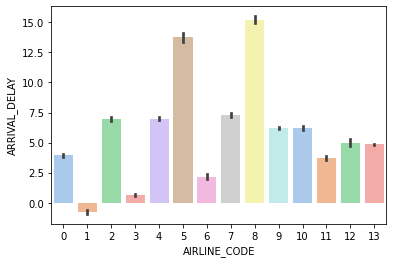

In [47]:
sns.barplot(x="AIRLINE_CODE", y= "ARRIVAL_DELAY", palette="pastel", data=flights_4)

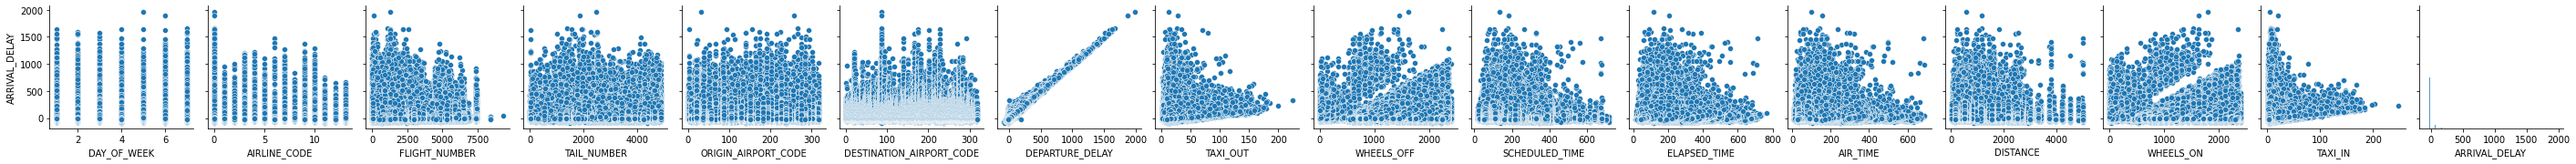

In [49]:
sns.pairplot(flights_4, y_vars=['ARRIVAL_DELAY'], kind="scatter")

In [50]:
#MODELE

In [1]:
y = flights_4.pop('ARRIVAL_DELAY')
X = flights_4

NameError: ignored

In [52]:
y.head()

0    1.0
1    2.0
2   -4.0
3    1.0
4   -2.0
Name: ARRIVAL_DELAY, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

seed_1 = 234  #Data preprocessing
test_size = 0.2
val_size = 0.25
seed_2 = 123  #Data training

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    random_state=seed_1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=val_size, 
                                                  random_state=seed_2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
#Regresja Liniowa

In [ ]:
model = LinearRegression()
model.fit(X,y)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

for i in range(2):
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                  test_size=test_size, 
                                                  random_state=i)
  y_predict = model.predict(X_test)
  print("R squared: {}".format(r2_score(y_test, y_predict)))
  print("MAE: {}".format(mean_absolute_error(y_test, y_predict)))
  print("MAPE: {}".format(mean_absolute_percentage_error(y_test, y_predict)))
  print("MSE: {}".format(mean_squared_error(y_test, y_predict)))
  print("RMSE: {}".format(mean_squared_error(y_test, y_predict, squared=False)))
  print("RMSE_NP: {}\n".format(np.sqrt(mean_squared_error(y_test, y_predict))))

In [ ]:
#Drzewa decyzyjne

In [ ]:
flights_tree = DecisionTreeRegressor()
flights_tree.fit(X,y)
y_predict = flights_tree.predict(X)
#print("R Squared: {}".format(r2_score(y,y_predict)))
for i in range(2):
  X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                      test_size=test_size,
                                                      random_state=i)
  y_predict = model_cars_tree.predict(X_test)
  print("R Squared: {}".format(r2_score(y_test,y_predict)))
  print("MAE: {}".format(mean_absolute_error(y_test,y_predict)))
  print("MAPE: {}".format(mean_absolute_percentage_error(y_test,y_predict)))
  print("MSE: {}".format(mean_squared_error(y_test,y_predict)))
  print("RMSE_NP: {}\n".format(np.sqrt(mean_squared_error(y_test,y_predict))))